In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minepy import MINE

qos = ['SCREEN_RESOLUTION_LONG','SCREEN_RESOLUTION_WIDTH','VIDEO_CLARITY','VIDEO_BITRATE',
        'INITIAL_DELAY','INITIAL_DELAY_PEAK_RATE','VIDEO_STALLING_NUM','VIDEO_STALLING_TOTAL_TIME',
        'VIDEO_TOTAL_TIME','VIDEO_PLAY_TOTAL_TIME','VIDEO_ALL_PEAK_RATE','VIDEO_AVERAGE_RATE',
        'PHONE_ELECTRIC_START','PHONE_ELECTRIC_END','PHONE_VERSION', 'PING_AVG_RTT','PIXEL_NUMBER',
        'BATTERY_LOSS','MEAN_STALLING_DURATION']
target = ['USER_SCORE','ELOADING','ESTALLING','EVMOS']

data = pd.read_csv('E:\\data\\sip\\after_LOF.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data_qos = data[qos]
data_target = data[target]

USER_SCORE = []
ELOADING = []
EVMOS = []
ESTALLING = []

for i in range(len(target)):
    print(target[i])
    if i == 0:
        for j in range(len(qos)):
            m = MINE()
            m.compute_score(data_qos[qos[j]], data_target[target[i]])
            USER_SCORE.append(m.mic())
    if i == 1:
        for j in range(len(qos)):
            m = MINE()
            m.compute_score(data_qos[qos[j]], data_target[target[i]])
            ELOADING.append(m.mic())
    if i == 2:
        for j in range(len(qos)):
            m = MINE()
            m.compute_score(data_qos[qos[j]], data_target[target[i]])
            ESTALLING.append(m.mic())
    if i == 3:
        for j in range(len(qos)):
            m = MINE()
            m.compute_score(data_qos[qos[j]], data_target[target[i]])
            EVMOS.append(m.mic())
            
MIC = {}
MIC['USER_SCORE'] = USER_SCORE
MIC['ELOADING'] = ELOADING
MIC['ESTALLING'] = ESTALLING
MIC['EVMOS'] = EVMOS

MIC_df = pd.DataFrame.from_dict(MIC)

USER_SCORE
ELOADING
ESTALLING
EVMOS


In [6]:
MIC_df.to_csv('E:\\data\\sip\\Maximal_Information_coefficient.csv')

In [70]:
name = []
for i in range(len(EVMOS)):
    name.append(i+1)

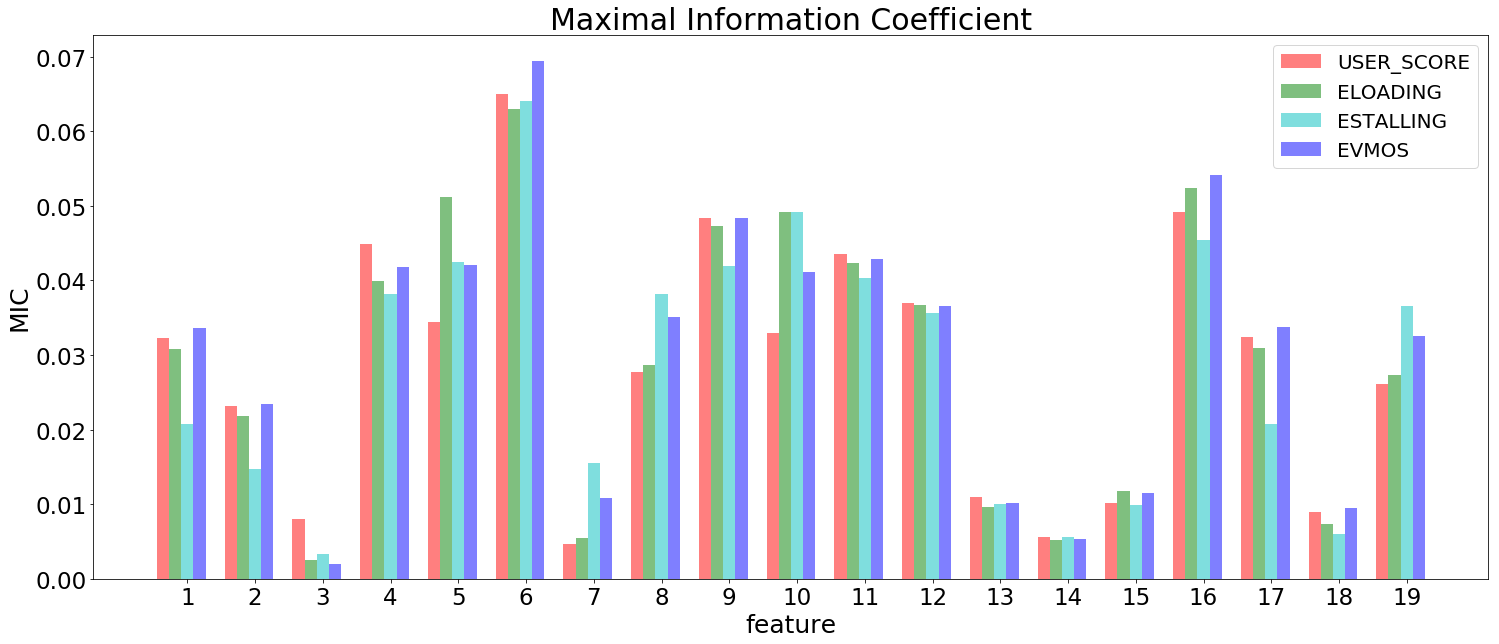

In [78]:
x = np.linspace(1, 21, len(EVMOS))

plt.figure(figsize=(25, 10))


plt.bar(x, 
        USER_SCORE, 
        width = 0.2, 
        color = 'r', 
        align = 'center', 
        label = 'USER_SCORE', 
        alpha = 0.5,)

plt.bar(x+0.2,
        ELOADING ,
        width = 0.2,
        color = 'g',
        align = 'center',
        label = 'ELOADING',
        alpha = 0.5
       )
plt.bar(x+0.4,
        ESTALLING ,
        width = 0.2,
        tick_label = name,
        color = 'c',
        align = 'center',
        label = 'ESTALLING',
        alpha = 0.5
       )
plt.bar(x+0.6,
        EVMOS ,
        width = 0.2,
        color = 'b',
        align = 'center',
        label = 'EVMOS',
        alpha = 0.5
       )

#plt.axhline(y = 0.004, c = 'gray', ls = '--', lw = 2, alpha = 0.6)
plt.tick_params(labelsize=23)

plt.xlabel('feature', fontsize = 25)
plt.ylabel('MIC', fontsize = 25)

plt.title('Maximal Information Coefficient', fontsize=30)
plt.legend(loc = 'upper right',fontsize=20)

plt.savefig('E:\\data\\sip\\1.png')
plt.show()